Let us Import all the required Modules.

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from tabulate import tabulate
print("Imported all the columns")

Imported all the columns


Load  the Dataset, Scale the Feature and Shuffle the rows.

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

#Scale:
train_df["median_house_value"] /=1000.0
test_df["median_house_value"] /=1000.0

#Shuffle/Reindex the train Data for a better model:

train_df = train_df.reindex(np.random.permutation(train_df.index))
print("Load,Scale and Shuffling has been Done")

Load,Scale and Shuffling has been Done


In [3]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14617,-122.17,37.77,39.0,1612.0,342.0,912.0,322.0,3.3958,141.9
11793,-121.32,37.96,5.0,123.0,21.0,50.0,20.0,2.7656,50.0
7130,-118.32,33.90,37.0,1664.0,401.0,1316.0,409.0,3.0526,216.4
9396,-119.21,34.26,26.0,2406.0,411.0,1313.0,391.0,4.9079,234.1
9385,-119.20,34.18,27.0,1035.0,229.0,782.0,222.0,4.2212,185.4


In [4]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344.7
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176.5
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270.5
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81.7


For Desired Outcome we will convert the longitude and latitude into Floating Point Value/Numerical Value for this Approach.
We call this function tf.feature_column.numeric_column

In [5]:
#To hold all the features column
feature_columns = []

#Numerical feature to represent Latitude and longitude:
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# layer that produces a dense Tensor based on given feature_columns.:
fp_feature_layer = layers.DenseFeatures(feature_columns)

print("The Longitude and Latitude converted to the Floating Points")

The Longitude and Latitude converted to the Floating Points


Now the Model will be trained on the FLoating Points values.

In [6]:
#Build the model :
def create_model(my_learning_rate,feature_layer):
    
    model = tf.keras.Sequential()
    
    model.add(feature_layer)
    
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=my_learning_rate),
            loss = "mean_squared_error",
             metrics = [tf.keras.metrics.RootMeanSquaredError()])
    
    
    return model
print("Model has been created")

Model has been created


In [7]:
#### Train the built Model:

def train_model(model,dataset,epochs,batch_size, label_name):
    
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features,y=label, batch_size=batch_size, epochs = epochs, shuffle = True)
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    
    return epochs, rmse
print("Training Model created")

Training Model created


In [8]:
#plotting the loss curve:
def plot_the_loss_curve(epochs,rmse):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label = "Loss in per Epochs")
    plt.legend()
    plt.ylim([rmse.min()*0.94, rmse.max()*1.05])
    plt.show()
print("Function to plot loss per Epochs is Created")

Function to plot loss per Epochs is Created


Choose the Hyper parameters Create, Train and Evaluate the Model:

Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 1s 35us/sample - loss: 81658.1087 - root_mean_squared_error: 285.7588
Epoch 2/30
17000/17000 [==============================] - 0s 26us/sample - loss: 81658.1085 - root_mean_squared_error: 285.7588
Epoch 3/30
17000/17000 [==============================] - 0s 27us/sample - loss: 81658.1083 - root_mean_squared_error: 285.7588
Epoch 4/30
17000/17000 [==============================] - 1s 31us/sample - loss: 81658.1078 - root_mean_squared_error: 285.7588
Epoch 5/30
17000/17000 [==============================] - 0s 26us/sample - loss: 81658.1084 - root_mean_squared_error: 285.7588
Epoch 6/30
17000/17000 [==============================] - 0s 24us/sample - loss: 81658.1090 - root_mean_squared_error: 285.7589
Epoch 7/30
17000/17000 [==============================] - 0s 22us/sample - loss: 81658.1077 - root_mean_squared_error: 285.7588
Epoch 8/30
17000/17000 [==============================] - 1s 31us/sample - loss: 

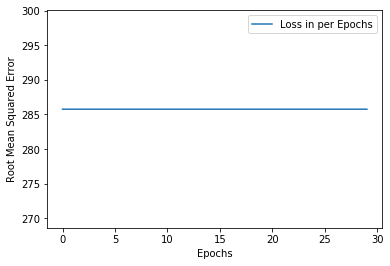


: Evaluate the new model against test set:
3000/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[80280.81796875, 283.3387]

In [9]:
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = "median_house_value"

#Create Model
my_model = create_model(learning_rate, fp_feature_layer)

#Train the Model on training set:
epochs, rmse = train_model(my_model, train_df, epochs, batch_size,label_name)

plot_the_loss_curve(epochs, rmse)
rmse_1 = rmse
print("\n: Evaluate the new model against test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label,batch_size = batch_size)

In [11]:
rmse_1 = min(rmse_1)

In [12]:
print(type(test_features),test_features)

<class 'dict'> {'longitude': array([-122.05, -118.3 , -117.81, ..., -119.7 , -117.12, -119.63]), 'latitude': array([37.37, 34.26, 33.78, ..., 36.3 , 34.1 , 34.42]), 'housing_median_age': array([27., 43., 27., ..., 10., 40., 42.]), 'total_rooms': array([3885., 1510., 3589., ...,  956.,   96., 1765.]), 'total_bedrooms': array([661., 310., 507., ..., 201.,  14., 263.]), 'population': array([1537.,  809., 1484., ...,  693.,   46.,  753.]), 'households': array([606., 277., 495., ..., 220.,  14., 260.]), 'median_income': array([6.6085, 3.599 , 5.7934, ..., 2.2895, 3.2708, 8.5608])}


In [13]:
print(test_label)

[344.7   176.5   270.5   ...  62.    162.5   500.001]


Previously we buit a Model by converting the Longitude and Langitude into the Numeric/Floating Point value. Now we have Another method called the Bucket Approach in which we will create multiple bins or bucket with say latitude with its neighbours using its Floating Point/Numeric Values.
Let us See how it Performs. 

In [14]:
resolution_in_degrees = 1.0

#Lets Create Feature column as we did in the Previous Floating Point Approach :
feature_columns = []

#Create Bucket Features:
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                          int(max(train_df['latitude'])),
                          resolution_in_degrees))

latitude  = tf.feature_column.bucketized_column(latitude_as_a_numeric_column,
                                              latitude_boundaries)

feature_columns.append(latitude)

longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                          int(max(train_df['longitude'])),
                          resolution_in_degrees))

longitude  = tf.feature_column.bucketized_column(longitude_as_a_numeric_column,
                                              longitude_boundaries)

feature_columns.append(longitude)

#Coverting the list feature columns into a layer for model:
bucket_feature_layer = layers.DenseFeatures(feature_columns)

Now we Converted the longitude and latitude into the floation point/Numeric and later applied the backet Approach with the Boundaries.
And now we will train and Evaluate the Model

Train on 17000 samples
Epoch 1/35
17000/17000 [==============================] - 0s 20us/sample - loss: 56385.7190 - root_mean_squared_error: 237.4568
Epoch 2/35
17000/17000 [==============================] - 0s 21us/sample - loss: 56385.7193 - root_mean_squared_error: 237.4567
Epoch 3/35
17000/17000 [==============================] - 0s 27us/sample - loss: 56385.7195 - root_mean_squared_error: 237.4567
Epoch 4/35
17000/17000 [==============================] - 0s 27us/sample - loss: 56385.7192 - root_mean_squared_error: 237.4567
Epoch 5/35
17000/17000 [==============================] - 0s 24us/sample - loss: 56385.7194 - root_mean_squared_error: 237.4567
Epoch 6/35
17000/17000 [==============================] - 0s 25us/sample - loss: 56385.7193 - root_mean_squared_error: 237.4567
Epoch 7/35
17000/17000 [==============================] - 0s 16us/sample - loss: 56385.7190 - root_mean_squared_error: 237.4567
Epoch 8/35
17000/17000 [==============================] - 0s 24us/sample - loss: 

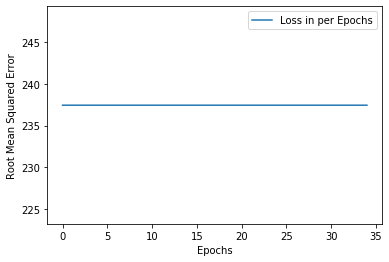


: Evalaluate the new model against the test set:
3000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[55125.373828125, 234.78789]

In [15]:
learning_rate = 0.04
epochs = 35

my_model = create_model(learning_rate, bucket_feature_layer)


epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)
rmse_2 = min(rmse)

print("\n: Evalaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size = batch_size)

If you compare the loss against only the Floating Point/Numeric aproach the Bucket Approach outperforms the Floating/Numeric Approach. 
But now the Question arise can we do better?.
Let us see another approach and Evaluate it.
The Approach is Called feature cross.

In [17]:
resolution_degree = 1.0

feature_columns = []

latitude_as_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                      int(max(train_df['latitude'])),
                                       resolution_degree))
latitude = tf.feature_column.bucketized_column(latitude_as_numeric_column,latitude_boundaries)

longitude_as_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                       resolution_degree))
longitude = tf.feature_column.bucketized_column(longitude_as_numeric_column,longitude_boundaries)

#Create a feture cross of latitude and longitude.
latitude_X_longitude = tf.feature_column.crossed_column([latitude,longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_X_longitude)
feature_columns.append(crossed_feature)

feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Train on 17000 samples
Epoch 1/35
17000/17000 [==============================] - 1s 45us/sample - loss: 56420.9543 - root_mean_squared_error: 237.5308
Epoch 2/35
17000/17000 [==============================] - 1s 38us/sample - loss: 56420.9540 - root_mean_squared_error: 237.5308
Epoch 3/35
17000/17000 [==============================] - 1s 31us/sample - loss: 56420.9543 - root_mean_squared_error: 237.5308
Epoch 4/35
17000/17000 [==============================] - 1s 33us/sample - loss: 56420.9545 - root_mean_squared_error: 237.5308
Epoch 5/35
17000/17000 [==============================] - 1s 40us/sample - loss: 56420.9545 - root_mean_squared_error: 237.5308
Epoch 6/35
17000/17000 [==============================] - 1s 42us/sample - loss: 56420.95

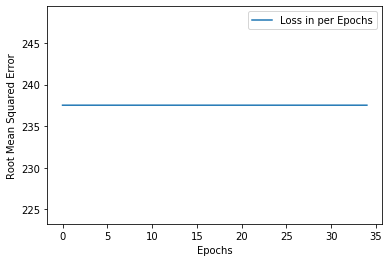


: Evaluate the new model against the test set:
3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[55160.36171875, 234.86232]

In [18]:
learning_rate = 0.04
epochs = 35

my_model = create_model(learning_rate, feature_cross_feature_layer)

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)
rmse_3 = min(rmse)
print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size = batch_size)

In [30]:
loss = [(rmse_1,rmse_2,rmse_3)]
Approach_label = ["FLoating Point", "Bucket Approach", "Feature Cross"]

print("This a Tabular Representation of how the Approaches has Performed")
print("--------------------------------------------------------------------")
print(tabulate(loss, headers=Approach_label))
print("---------------------------------------------------------------------")
print("Note: Lower the loss doesn't mean having a Actionable Model as the model might tend to Overfit and not give Desired results on Test Set")

This a Tabular Representation of how the Approaches has Performed
--------------------------------------------------------------------
  FLoating Point    Bucket Approach    Feature Cross
----------------  -----------------  ---------------
         285.759            237.457          237.531
---------------------------------------------------------------------
Note: Lower the loss doesn't mean having a Actionable Model as the model might tend to Overfit and not give Desired results on Test Set
